In [1]:
import pandas as pd

# Load the dataset
file_path = 'E-Scooter_Trips_-_2019_Pilot_20241031.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Basic Info:")
df.info()

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Display the first few rows to get an overview of the data
print("\nFirst Few Rows:\n", df.head())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710839 entries, 0 to 710838
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip ID                      710839 non-null  object 
 1   Start Time                   710839 non-null  object 
 2   End Time                     710839 non-null  object 
 3   Trip Distance                710839 non-null  int64  
 4   Trip Duration                710839 non-null  int64  
 5   Accuracy                     710839 non-null  int64  
 6   Start Census Tract           382637 non-null  float64
 7   End Census Tract             382475 non-null  float64
 8   Start Community Area Number  613450 non-null  float64
 9   End Community Area Number    612923 non-null  float64
 10  Start Community Area Name    613450 non-null  object 
 11  End Community Area Name      612923 non-null  object 
 12  Start Centroid Latitude      613451 non-null  

In [5]:
# Convert 'Start Time' and 'End Time' to datetime format with specified format
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['End Time'] = pd.to_datetime(df['End Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Drop rows with missing 'Start Time' or 'End Time'
df = df.dropna(subset=['Start Time', 'End Time'])

# Check remaining missing values in other columns
print("Remaining Missing Values:\n", df.isnull().sum())


Remaining Missing Values:
 Trip ID                             0
Start Time                          0
End Time                            0
Trip Distance                       0
Trip Duration                       0
Accuracy                            0
Start Census Tract             328202
End Census Tract               328364
Start Community Area Number     97389
End Community Area Number       97916
Start Community Area Name       97389
End Community Area Name         97916
Start Centroid Latitude         97388
Start Centroid Longitude        97388
Start Centroid Location         97388
End Centroid Latitude           97916
End Centroid Longitude          97916
End Centroid Location           97916
dtype: int64


In [6]:
# Define columns to consider for dropping rows with missing values
columns_to_check = [
    'Start Census Tract',
    'End Census Tract',
    'Start Community Area Number',
    'End Community Area Number',
    'Start Community Area Name',
    'End Community Area Name',
    'Start Centroid Latitude',
    'Start Centroid Longitude',
    'End Centroid Latitude',
    'End Centroid Longitude',
    'Start Centroid Location',
    'End Centroid Location'
]

# Drop rows with missing values in specified columns
df = df.dropna(subset=columns_to_check)

# Check remaining missing values in other columns
print("Remaining Missing Values:\n", df.isnull().sum())


Remaining Missing Values:
 Trip ID                        0
Start Time                     0
End Time                       0
Trip Distance                  0
Trip Duration                  0
Accuracy                       0
Start Census Tract             0
End Census Tract               0
Start Community Area Number    0
End Community Area Number      0
Start Community Area Name      0
End Community Area Name        0
Start Centroid Latitude        0
Start Centroid Longitude       0
Start Centroid Location        0
End Centroid Latitude          0
End Centroid Longitude         0
End Centroid Location          0
dtype: int64


In [7]:
import geopandas as gpd
from shapely.geometry import Point

# Create geometry from centroids
geometry = [Point(lon, lat) for lon, lat in zip(df['Start Centroid Longitude'], df['Start Centroid Latitude'])]

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set coordinate reference system (CRS) if necessary
gdf.set_crs(epsg=4326, inplace=True)  # WGS 84


,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Accuracy,Start Census Tract,End Census Tract,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location,geometry
10291,0dd95046-1bc8-4464-ba39-7f9e92c668b3,2019-08-06 18:00:00,2019-08-06 18:00:00,1004,236,152,1.703120e+10,1.703120e+10,20.0,20.0,HERMOSA,HERMOSA,41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),POINT (-87.73760 41.93505)
10293,6819df6a-9623-4ae0-b1d3-ec617197d229,2019-07-08 16:00:00,2019-07-08 17:00:00,9124,3182,10,1.703115e+10,1.703119e+10,15.0,19.0,PORTAGE PARK,BELMONT CRAGIN,41.949592,-87.761958,POINT (-87.7619580301513 41.9495915671753),41.920143,-87.760827,POINT (-87.7608269556143 41.920143229102),POINT (-87.76196 41.94959)
10342,aa71bb53-3e7f-4964-b6e6-030800419346,2019-08-10 21:00:00,2019-08-10 21:00:00,502,97,152,1.703184e+10,1.703184e+10,27.0,27.0,EAST GARFIELD PARK,EAST GARFIELD PARK,41.885045,-87.713862,POINT (-87.71386248059811 41.8850448415253),41.885045,-87.713862,POINT (-87.71386248059811 41.8850448415253),POINT (-87.71386 41.88504)
10367,5d256770-1a8a-5e20-8f78-316d1819f46b,2019-06-25 19:00:00,2019-06-25 20:00:00,5053,2167,0,1.703122e+10,1.703119e+10,22.0,19.0,LOGAN SQUARE,BELMONT CRAGIN,41.921126,-87.699754,POINT (-87.6997540616386 41.9211256768265),41.927819,-87.751362,POINT (-87.7513623675995 41.9278186319205),POINT (-87.69975 41.92113)
10369,dffe5324-5f6f-48e7-9edf-d51876ba7d2f,2019-09-19 08:00:00,2019-09-19 08:00:00,790,111,152,1.703119e+10,1.703120e+10,19.0,20.0,BELMONT CRAGIN,HERMOSA,41.935218,-87.744389,POINT (-87.7443888733072 41.9352176386575),41.927852,-87.735628,POINT (-87.7356282729632 41.9278522690551),POINT (-87.74439 41.93522)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710795,11dbbaaa-df3f-1ed6-11db-baaadf3f1ed6,2019-06-30 13:00:00,2019-06-30 13:00:00,1190,392,10,1.703119e+10,1.703119e+10,19.0,19.0,BELMONT CRAGIN,BELMONT CRAGIN,41.934986,-87.761463,POINT (-87.7614634532553 41.9349864216129),41.934986,-87.761463,POINT (-87.7614634532553 41.9349864216129),POINT (-87.76146 41.93499)
710798,11efe7b6-edec-d4ec-11ef-e7b6edecd4ec,2019-07-15 20:00:00,2019-07-15 20:00:00,0,10,10,1.703119e+10,1.703119e+10,19.0,19.0,BELMONT CRAGIN,BELMONT CRAGIN,41.934860,-87.771232,POINT (-87.7712317706719 41.9348596372536),41.934860,-87.771232,POINT (-87.7712317706719 41.9348596372536),POINT (-87.77123 41.93486)
710806,c0e9e8c2-fe71-4799-89c1-885cfc2b573a,2019-09-17 17:00:00,2019-09-17 17:00:00,8,78,10,1.703119e+10,1.703119e+10,19.0,19.0,BELMONT CRAGIN,BELMONT CRAGIN,41.919629,-87.750976,POINT (-87.7509763515862 41.9196293422931),41.919629,-87.750976,POINT (-87.7509763515862 41.9196293422931),POINT (-87.75098 41.91963)
710831,f5d09075-c8ba-4e9b-9b07-6069fb2acee1,2019-07-09 21:00:00,2019-07-09 21:00:00,2107,346,152,1.703183e+10,1.703119e+10,20.0,19.0,HERMOSA,BELMONT CRAGIN,41.915319,-87.732250,POINT (-87.7322503417904 41.91531879687441),41.919230,-87.743801,POINT (-87.74380099982481 41.9192298066712),POINT (-87.73225 41.91532)


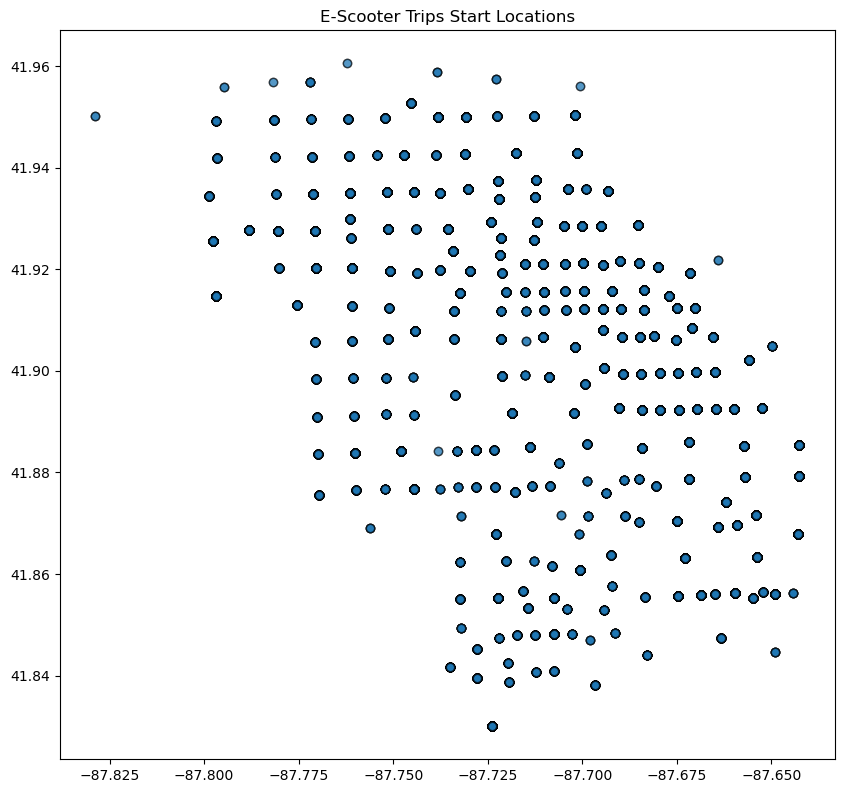

In [8]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
plt.title('E-Scooter Trips Start Locations')
plt.show()


In [19]:
import folium
from folium.plugins import HeatMap
from IPython.display import display, IFrame

# Prepare the data for the HeatMap by dropping any rows with NaN values
heatmap_data = df[['Start Centroid Latitude', 'Start Centroid Longitude']].dropna().values.tolist()

# Initialize the map centered around the mean location of the data points
m = folium.Map(location=[df['Start Centroid Latitude'].mean(), df['Start Centroid Longitude'].mean()], zoom_start=12)

# Add the heatmap layer to the map
HeatMap(data=heatmap_data, radius=15).add_to(m)

# Save the map as an HTML file (optional)
m.save('heatmap.html')

# Display the map inline in the Jupyter notebook
display(IFrame('heatmap.html', width=700, height=500))


In [15]:
import geopandas as gpd
from shapely.geometry import Point

# Convert start and end coordinates into geometry points
start_geometry = [Point(lon, lat) for lon, lat in zip(df['Start Centroid Longitude'], df['Start Centroid Latitude'])]
end_geometry = [Point(lon, lat) for lon, lat in zip(df['End Centroid Longitude'], df['End Centroid Latitude'])]

# Create GeoDataFrames for start and end points
gdf_start = gpd.GeoDataFrame(df, geometry=start_geometry, crs="EPSG:4326")
gdf_end = gpd.GeoDataFrame(df, geometry=end_geometry, crs="EPSG:4326")


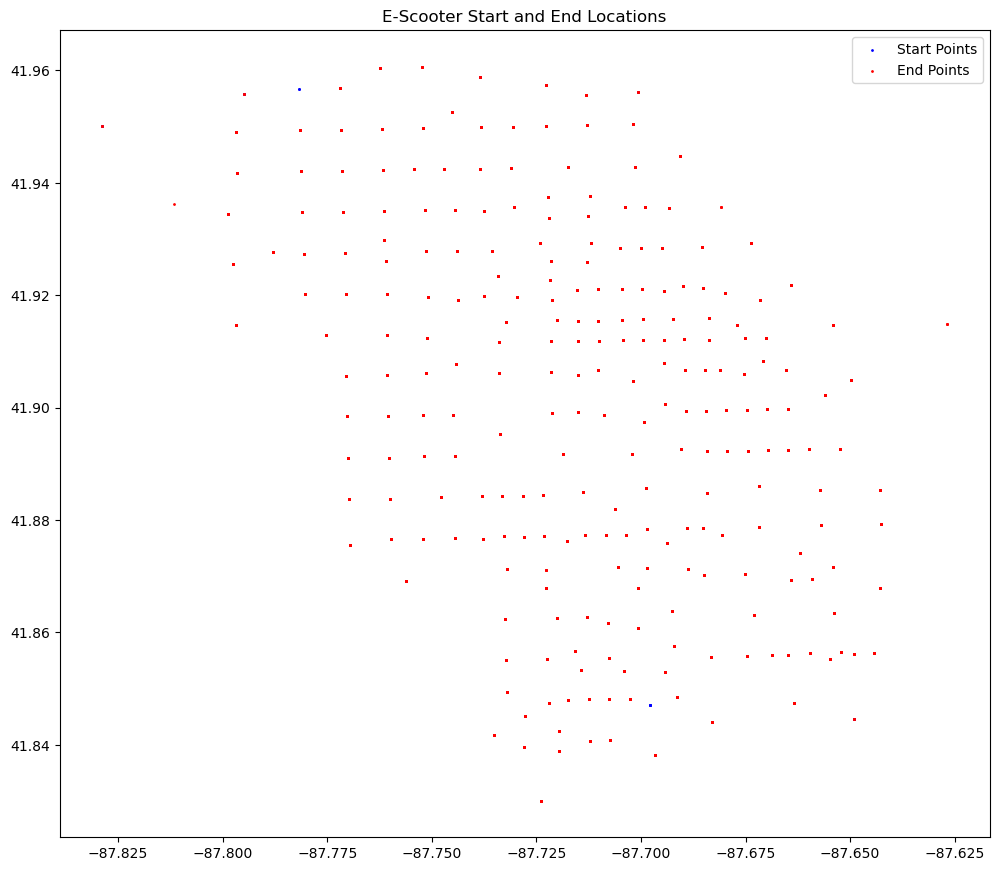

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_start.plot(ax=ax, color='blue', markersize=1, label='Start Points')
gdf_end.plot(ax=ax, color='red', markersize=1, label='End Points')
plt.legend()
plt.title('E-Scooter Start and End Locations')
plt.show()
